In [2]:
#import
import matplotlib.pyplot as plt
import re
import bs4
import json
import time
import requests
import scipy as sc
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
#from selenium import webdriver
#from selenium.webdriver.common.by import By
from collections import OrderedDict
import folium
import branca.colormap as cmp


In [3]:
#crowd
crowd=pd.DataFrame(pd.read_csv('eurovision_crowd_dataset.csv'))
total1=pd.DataFrame(pd.read_csv('eurovision_dataset.csv'))


In [4]:
total=total1[total1['Year']==1975]
total
subCrowd=crowd[crowd['Year']==1975]
for col in subCrowd.columns[0:-1]:
    total[f'Crowd {col}']=subCrowd[col]

for year in range(1976,2021):
    if year==2020:
        year+=1
    subTotal1=total1[total1['Year']==year]
    subCrowd=crowd[crowd['Year']==year]
    for col in subCrowd.columns[0:-1]:
        subTotal1[f'Crowd {col}']=subCrowd[col]
    total=pd.concat([total,subTotal1])
total
total

C:\Users\user-pc\AppData\Local\Temp/ipykernel_4752/4191171517.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total[f'Crowd {col}']=subCrowd[col]
C:\Users\user-pc\AppData\Local\Temp/ipykernel_4752/4191171517.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subTotal1[f'Crowd {col}']=subCrowd[col]


,Country,Song,Artist,Year,Points,R/O,Place,Contest_Location,Jury 1.0,Jury 2.0,...,Crowd 1,Crowd 2,Crowd 3,Crowd 4,Crowd 5,Crowd 6,Crowd 7,Crowd 8,Crowd 10,Crowd 12
0,Belgium,Gelukkig Zijn,Ann Christy,1975,17.0,11,15,Stockholm,Israel,France,...,No Crowd,No Crowd,No Crowd,No Crowd,No Crowd,No Crowd,No Crowd,No Crowd,No Crowd,No Crowd
1,Finland,Old Man Fiddle,Pihasoittajat,1975,74.0,15,7,Stockholm,Ireland,Monaco,...,No Crowd,No Crowd,No Crowd,No Crowd,No Crowd,No Crowd,No Crowd,No Crowd,No Crowd,No Crowd
2,France,Et Bonjour à Toi L'artiste,Nicole Rieu,1975,91.0,3,4,Stockholm,Israel,Portugal,...,No Crowd,No Crowd,No Crowd,No Crowd,No Crowd,No Crowd,No Crowd,No Crowd,No Crowd,No Crowd
3,Germany,Ein Lied Kann Eine Brücke Sein,Joy Fleming,1975,15.0,4,17,Stockholm,Israel,Yugoslavia,...,No Crowd,No Crowd,No Crowd,No Crowd,No Crowd,No Crowd,No Crowd,No Crowd,No Crowd,No Crowd
4,Ireland,That's What Friends Are For,The Swarbriggs,1975,68.0,2,9,Stockholm,Israel,Switzerland,...,No Crowd,No Crowd,No Crowd,No Crowd,No Crowd,No Crowd,No Crowd,No Crowd,No Crowd,No Crowd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1053,Spain,Voy A Quedarme,Blas Cantó,2021,6.0,13,24,Rotterdam,Greece,Lithuania,...,Portugal,Finland,Malta,Lithuania,Iceland,Ukraine,Switzerland,Bulgaria,Italy,France
1054,Sweden,Voices,Tusse,2021,109.0,25,14,Rotterdam,Belgium,Norway,...,Serbia,Malta,Italy,Ukraine,Switzerland,France,Lithuania,Norway,Iceland,Finland
1055,Switzerland,Tout l'univers,Gjon's Tears,2021,432.0,11,3,Rotterdam,Finland,Azerbaijan,...,Lithuania,Ukraine,Sweden,Finland,Iceland,France,Albania,Portugal,Italy,Serbia
1056,Ukraine,Shum,Go_A,2021,364.0,19,5,Rotterdam,Norway,Portugal,...,Belgium,Sweden,Azerbaijan,Russia,France,Iceland,Switzerland,Finland,Lithuania,Italy


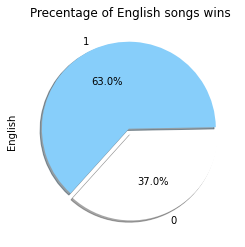

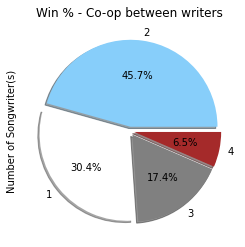

C:\Users\user-pc\AppData\Local\Temp/ipykernel_4752/2408654858.py:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Winner = total[total['Year'] == Year][total['Place'] == 1]['Country'].values[0]   #Extract the winner Name each year


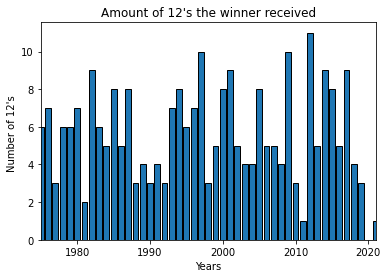

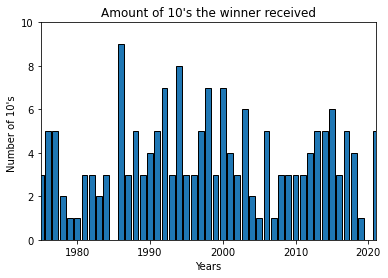

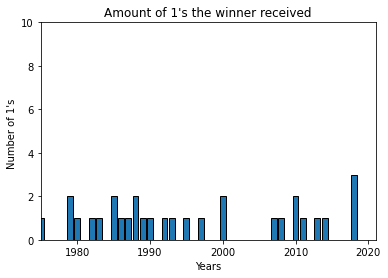

In [5]:
wikidf=pd.DataFrame(pd.read_csv('WikiVision_1975-2021.csv'))
for col in wikidf.columns:
    total[col]=wikidf[col]





total[total['Place'] == 1]['English'].value_counts().plot(kind = 'pie',colors = ['lightskyblue','white'],explode = (0.03,0.03),startangle = 1, autopct='%1.1f%%',shadow=True,)
plt.title("Precentage of English songs wins")
plt.show()
 

 
total[total['Place'] == 1]['Number of Songwriter(s)'].value_counts().plot(kind ='pie',colors = ['lightskyblue', 'white', 'gray','brown'], explode = (0.05,0.05,0.05,0.05),autopct='%1.1f%%',shadow=True)
plt.title("Win % - Co-op between writers")
plt.show()


#total[total['Place'] == 1]['Jury 12.0'].value_counts()
Years = total[total['Place'] == 1]['Year'].values
from collections import Counter

tensAmounts = []
duzeAmounts = []
onesAmounts = []

for Year in Years:
    Winner = total[total['Year'] == Year][total['Place'] == 1]['Country'].values[0]   #Extract the winner Name each year
    duzeAmounts.append(Counter(total[total['Year'] == Year]['Jury 12.0'])[Winner]) #Get the amount of 12's from the counter array
    tensAmounts.append(Counter(total[total['Year'] == Year]['Jury 10.0'])[Winner]) #Get the amount of 10's from the counter array
    onesAmounts.append(Counter(total[total['Year'] == Year]['Jury 1.0'])[Winner]) #Get the amount of 1's from the counter array


#Amounts of 12,10,8 the winner received, bar plots:
plt.bar(Years,duzeAmounts,edgecolor = 'black')
plt.title("Amount of 12's the winner received")
plt.xlim(1975,2021)
plt.xlabel('Years')
plt.ylabel("Number of 12's ")
plt.show()


plt.bar(Years,tensAmounts,edgecolor = 'black')
plt.title("Amount of 10's the winner received")
plt.xlabel('Years')
plt.ylabel("Number of 10's ")
plt.ylim(0,10)
plt.xlim(1975,2021)
plt.show()



plt.bar(Years,onesAmounts,edgecolor = 'black')
plt.title("Amount of 1's the winner received")
plt.xlabel('Years')
plt.ylabel("Number of 1's ")
plt.ylim(0,10)
plt.xlim(1975,2021)
plt.show()
















In [6]:
#Counter(total[total['Year'] == Year]['Jury 1.0'])[Winner])
#rCounter(total[total['Country'] == 'Greece']['Jury 12.0'].values)

Countries = {
        #UP-DOWN,LEFT-RIGHT    
'Albania':[41.00,20.00],
'Armenia':[40.00,45.00],
'Australia':[-27.00,133.00],
'Austria':[47.20,13.20],
'Azerbaijan':[40.30,47.30],
'Belgium':[50.50,4.00],
'Bosnia & Herzegovina': [44.00,18.00],
'Bulgaria':[43.00,25.00],
'Croatia':[45.10,15.30],
'Cyprus':[35.00, 33.00],
'Czech Republic':[49.45, 15.30],
'Denmark':[56.00, 10.00],
'Estonia':[56.00, 10.00],
'Finland':[59.00,26.00],
'France':[46.00,2.00],
'Georgia':[42.00,43.30],
'Germany':[51.00,9.00],
'Greece':[39.00, 22.00],
'Hungary':[47.00,20.00],
'Iceland':[65.00,-18.00],
'Ireland':[53.00,-8.00],
'Israel':[32.00, 35.3],
'Italy':[42.50,12.50],
'Latvia':[57.00, 25.00],
'Lithuania':[56.00, 24.00],
'Luxembourg':[50.00, 6.10],
'Malta':[36, 14.55],
'Moldova':[47.00, 29.00],
'Monaco':[43.44, 7.24],
'Montenegro':[42.30, 19.18],
'Morocco':[32.00,5.00],
'Netherlands':[52.30, 5.45],
'North Macedonia':[41.50,22.00],
'Norway':[62.00, 10.00],
'Poland':[52.00, 20.00],
'Portugal':[39.30,-8.00],
'Romania':[46.00,25.00],
'Russia':[60.00,100.00],
'San Marino':[43.46,12.25],
'Serbia':[44.00,21.00],
'Serbia & Montenegro':[44.00,21.00],
'Slovakia':[48.40,19.30],
'Slovenia':[46.07,14.49],
'Spain':[40.00,-4.00],
'Sweden':[62.00,15.00],
'Switzerland':[47.00, 8.00],
'Turkey':[39.00,35.00],
'Ukraine':[49.00,32.00],
'United Kingdom':[53.00,-2.00],
'Yugoslavia':[43.85,18.25]}

DrawMap = folium.Map(location = [50.0000,55],zoom_start=3.5,tiles = 'Stamen Toner')
RepDict = {} #-> {Greece:19,Belgium:8...} amount of reptitive 12's over the years.
for Country in Countries:
    MaxRep = 0
    counter = Counter(total[total['Country'] == Country]['Jury 12.0'].values)
    for key in counter:
            MaxRep = max(MaxRep,counter[key])
    RepDict[Country] = MaxRep



WinsDict = Counter(total[total['Place'] == 1]['Country'].values) #Counter array that returns all the winners and the amount of wins!
for Country in Countries:
     Wins = 0
     if Country in WinsDict:
         Wins = WinsDict[Country]
    
     if RepDict[Country] <= 4:  
         color = 'blue'
     
     elif RepDict[Country] > 4 and RepDict[Country] < 8: 
        color = 'orange'

     else:
        color = 'red'

     folium.Marker(location = Countries[Country],popup='<strong>'+Country+'<strong/>\n'+str(Wins)+' Wins',icon=folium.Icon(color=color,icon='music',prefix='fa')).add_to(DrawMap)

DrawMap


 
# DrawMap.choropleth(
#      geo_data='vic.geojson',
#         data=df,
#         columns=['Suburb','Count'],
#         key_on='feature.properties.Suburb_Name',
#         fill_color='YlOrRd',
#         fill_opacity=0.7,
#         line_opacity=0.2,
#         legend_name="Reptitive 12's"
#         )
